# Сравнение оценок и эффективные оценки. Задача 3


__Ильичёв А.С., 693__

In [2]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Рассмотрим $X_1, \dots, X_N \sim Bern(\theta), N = 1000$. По сетке значений $\theta \in [0, 1]$ с шагом $0.01$ построим график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$.

За этими словами скрывается величина $1/I_X(\theta)$ (т.к. $\tau(\theta) = \theta$). Для распределения Бернулли $I_X(\theta) = \frac{n}{\theta(1-\theta)}$.

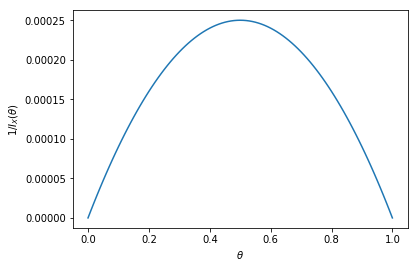

In [17]:
N = 1000
lower_est = lambda  theta, n: (theta * (1 - theta)) / n 
grid = np.linspace(0, 1, 100 + 1)
plt.plot(grid, lower_est(grid, N))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$1/I_X(\theta)$')
plt.show()

Видим, что нижняя оценка дисперсии представляет собой параболу ветвями вниз, симметричную относительно $\theta = 0.5$. То есть чем ближе вероятность успешного исхода в распределении Бернулли к $0.5$ (с обеих сторон), тем больше будет дисперсия оценки этого параметра (оценка менее точная).

#### 3. Для каждого значения $\theta$ сгенерируем выборку размера N, посчитаем эффективную оценку $\theta$ и бутстрепную оценку дисперсии этой оценки. 

Эффективной оценкой для данного распределения является $\overline X$.

Здесь мы не будем брать функцию из задачи 3.1, потому что нам нужно строить бутстрепную оценку только для одного $n$.

In [23]:
est_func = lambda x : np.mean(x)

# число бутстрепных выборок
straps_num = 500

var_strap = []
for theta in grid:
    sample = sts.bernoulli(theta).rvs(N)
    est = est_func(sample)
    samples = sts.bernoulli(est).rvs(size=(straps_num, N))
    ests_strap = np.array([est_func(sample) for sample in samples])
    var_strap.append(np.mean(ests_strap**2) - (np.mean(ests_strap))**2)

#### 4. Построим график зависимости бутстрепных оценок от $\theta$.

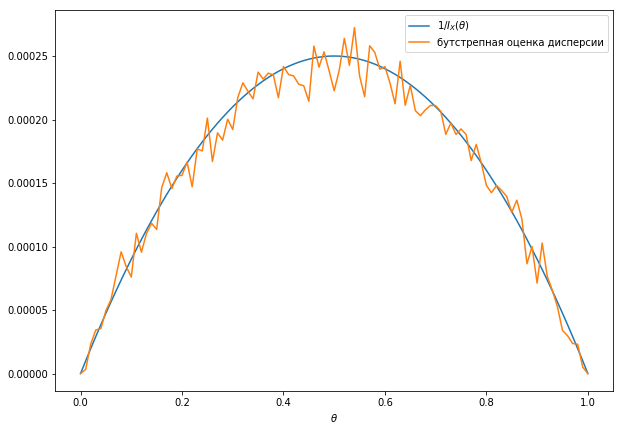

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(grid, lower_est(grid, N), label= r'$1/I_X(\theta)$')
plt.plot(grid, var_strap, label='бутстрепная оценка дисперсии')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

#### 5. Вывод.

Мы еще раз получили подтверждение того, что для эффективной оценки бутстрепная оценка дисперсии с высокой точностью совпадает с истинной дисперсией для любого значения параметра.